In [15]:
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
% matplotlib inline

#### 1. acceptance-rejection method

generate Z~N(0,1) using exp(1)
PDF of $|Z| = \frac {2} {\sqrt{2\pi}}e^{\frac{-x^{2}}{2}}=f(x)$, for $x\geq0$ <br>
Let $g(x)=e^{-x}$

In [16]:
def g(x):
    return np.exp(-x)
def f(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

sample_counts = 10000
samples = []
for _ in range(sample_counts):
    # draw Y under exponential dist.
    y = np.random.exponential(1)
    M = 2 
    U = np.random.uniform(0,1)
    if U<f(y)/(M*g(y)):
        z = abs(y)
    U = np.random.uniform(0,1)
    if U > 0.5:
        samples.append(z)
    else:
        samples.append(-z)

NameError: name 'z' is not defined

In [ ]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma), label="ground truth")
plt.hist(samples,bins=100, normed=True, label="samples' histogram")
plt.title("sample N(0,1) using Expo(1)")
plt.legend()
plt.show()


#### Metropolis-Hastings Sampler

In [3]:
# import random
# import collections

# def metrosamp(ITER):
#     P = {0: 0.2, 1: 0.8}
#     Q = {1: 0, 0: 1}
#     X = []
#     xt = 0
#     for i in range(ITER):
#         xtp1 = Q[xt]
#         alpha = min(1., P[xtp1] / P[xt])
#         if random.random() <= alpha:
#             xt = xtp1
#         X.append(xt)
#     return X


# def count(X):
#     counter = collections.Counter(X)
#     for key in counter:
#         print (key, counter[key])

In [4]:
def metrosamp(ITER):
    P = {0: 0.2, 1: 0.8}
#     Q = {1: 0, 0: 1}
    Q = [[0,1], [1,0]]
    Q_ = [[0,1], [1,0]]
    X = []
    xt = 0
    for i in range(ITER):
        if random.random() < Q[xt][1-xt]:
            xtp1 = 1-xt
        else:
            xtp1 = xt
        alpha = min(1., P[xtp1] / P[xt])
        Q_[xt][xtp1] = alpha
        Q_[xt][xt] = 1- alpha
        if random.random() <= alpha:
            xt = xtp1
        X.append(xt)
    return X, Q_

def count(X):
    counter = collections.Counter(X)
    for key in counter:
        print (key,":", counter[key])

In [5]:
x, Q= metrosamp(1000)

print("transition matrix:\n",np.array(Q))
print("output count:")
count(x)

transition matrix:
 [[ 0.    1.  ]
 [ 0.25  0.75]]
output count:
1 : 792
0 : 208


#### Generate gamma distribution

In [6]:
import numpy as np
import random
import collections
import matplotlib.pyplot as plt
import math
import scipy.stats
% matplotlib inline

# Gamma distribution
def p_func_raw(x, a, b):
    S1 = ((b ** a) / math.gamma(a))
    S2 = x ** (a - 1)
    S3 = math.exp(-b * x)
    return S1 * S2 * S3  # * S4

# Gamma(x,2,1) 
def p_func(y):
    return p_func_raw(y, 2, 1)

# proposed distribution is exponantial distribution
# generate aj
def q_func(beta):
    return np.random.exponential(beta) # generate proposed state

# compute correction factor
def q_func_pdf(x, beta):
    return scipy.stats.expon.pdf(x, scale=beta) # generate probability

def metrohast(M):
    X = []
    beta = 5.
    xt = beta
    for i in range(M):
        aj = q_func(beta)
        c = q_func_pdf(xt, beta) / q_func_pdf(aj, beta) # correction factor
        alpha = min(1., (p_func(aj) / p_func(xt)) * c)
        if random.random() <= alpha:
            xt = aj
        X.append(xt)
    return X

def draw(S):
    n, bins, patches = plt.hist(S, 100, normed=1, facecolor='b', alpha=0.2)
    
    plt.plot(bins, [p_func(x) for x in bins], color='r')
    plt.show()

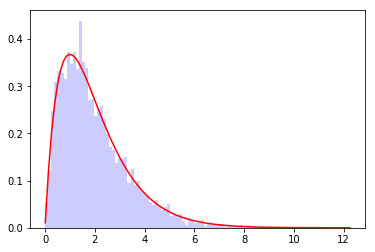

In [7]:
X = metrohast(10000)
draw(X)

reference : http://cpmarkchang.logdown.com/posts/737249-pgm-metropolis-hasting

#### 1. sample for  the cauchy distributionbr<br>
$f(x)=\frac{1}{\pi(1+x^{2})}$

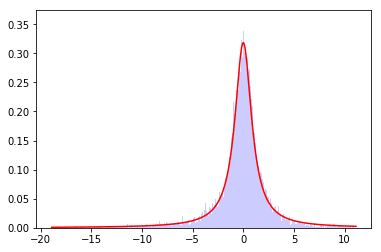

In [8]:
# random-walk Metropolis
# q is symmetric, 所以會消掉。 acceptance prob. 剩 f ratio
def std_cauchy_pdf(x):
    return 1/(np.pi*(1+x**2))

max_iter = 40000
chain = [0]
for i in range(max_iter):
    proposal = chain[i] + np.random.uniform(low=-1,high=1)
    if np.random.uniform() < min(1, (std_cauchy_pdf(proposal)/std_cauchy_pdf(chain[i]))):
        chain.append(proposal)
    else:
        chain.append(chain[i])

n, bins, patches = plt.hist(chain, 1000, normed=1, facecolor='b', alpha=0.2)
plt.plot(bins, [std_cauchy_pdf(x) for x in bins], color='r') # pdf from package
# plt.xlim(-5,5)
plt.show()

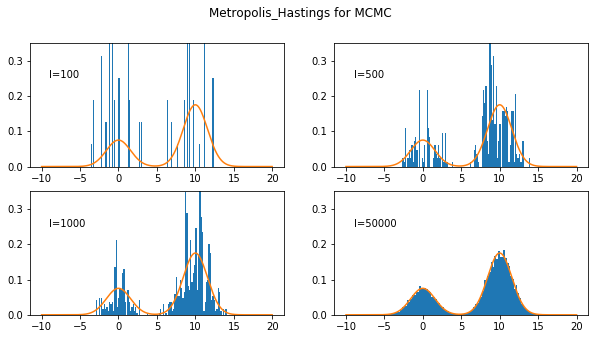

In [14]:
# sample weird functikon
def q(x_star,x):
 #normal distribution centered at the current value
    mu=x
    sigma=10
    return 1/(math.pi*2)**0.5/sigma*np.exp(-(x_star-mu)**2/2/sigma**2) 

def p(x): #target distribution
    return 0.3*np.exp(-0.2*x**2)+0.7*np.exp(-0.2*(x-10)**2)
    
N = [100,500,1000,50000]
fig = plt.figure(figsize=(10,5))
for i in range(4):
    X = np.array([])
    x = 0.1 #initialize x0 to be 0.1
    for j in range(N[i]):
        u = np.random.rand()
        x_star = np.random.normal(x,10) # 以上一點 x 為中心做 normal 抽樣
        A = min(1,p(x_star)*q(x,x_star)/p(x)/q(x_star,x)) # q(x,x_star) = q(x|x_star)
        if u < A:
            x = x_star
        X=np.hstack((X,x))
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(X,bins=100,normed=True)
    x = np.linspace(-10,20,5000)
    ax.plot(x,p(x)/4) #2.7 is just a number that approximates the normalizing constant
    ax.set_ylim(0,0.35)
    ax.text(-9,0.25,'I=%d'%N[i])
fig.suptitle('Metropolis_Hastings for MCMC')
plt.show()